In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [4]:
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn import datasets

In [5]:
# Sklearn regression model evaluation functions
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

### Lectura de Train & Test sets previamente trabajados

In [6]:
data = pd.read_csv('Delayed_Flights_no_dummies_train.csv', ',')
#test = pd.read_csv('Delayed_Flights_test_final.csv', ',')

In [7]:
len(data)

1542690

In [8]:
reduced_sample_train, reduced_sample_test = train_test_split(data, test_size = 0.9, random_state=42)

In [9]:
len(reduced_sample_train)

154269

In [10]:
train, test = train_test_split(reduced_sample_train, test_size = 0.2, random_state=42)

In [11]:
train.head()

,Unnamed: 0,index,DayOfWeek,FullCarrier,Origin,Dest,Cancelled,ArrDelay,CRSElapsedTime,DepDelay,ArrTime,DepTime,AirTime,Distance,AvgSpeed,10%_Delayed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range
747974,747976,783552,7,Southwest Airlines Co.,AMA,DAL,0,0.789373,-0.971942,0.956057,21:32,20:34,-0.907845,-0.768833,0.251940,1,1.487356,More_than40%_Delay,2100-2159,2000-2059
896507,896509,1020179,7,American Airlines Inc.,STL,SFO,0,-0.179340,1.485627,-0.283182,13:02,10:58,1.730294,1.692278,0.608784,1,-0.424566,10_to_20%_Delay,1300-1359,1000-1059
1525158,1525164,1487969,5,Skywest Airlines Inc.,SLC,RAP,0,-0.637276,-0.494472,-0.696262,18:32,16:53,-0.514310,-0.448122,0.201919,0,-0.538806,Not_delayed,1800-1859,1600-1659
432233,432234,334687,6,Southwest Airlines Co.,BWI,MHT,0,-0.637276,-0.831510,-0.639933,11:01,09:49,-0.718365,-0.676454,-0.134247,0,-0.508659,Not_delayed,1100-1159,0900-0959
1161614,1161619,1719971,6,AirTran Airways Corporation,ATL,PIT,0,0.983116,-0.550645,1.312807,01:23,00:03,-0.645488,-0.416748,0.946229,1,1.001839,More_than40%_Delay,0001-0559,0001-0559


In [12]:
train.columns

Index(['Unnamed: 0', 'index', 'DayOfWeek', 'FullCarrier', 'Origin', 'Dest',
       'Cancelled', 'ArrDelay', 'CRSElapsedTime', 'DepDelay', 'ArrTime',
       'DepTime', 'AirTime', 'Distance', 'AvgSpeed', '10%_Delayed',
       'ArrDelay_vs_CRSElapsedTime', 'Delay_level', 'ArrTime_Range',
       'DepTime_Range'],
      dtype='object')

# EJERCICIO 1

### Modelo rudimentario sin inclusión de variables categóricas

In [13]:
columns_to_drop = ['FullCarrier', 'Origin', 'Dest', 'ArrDelay_vs_CRSElapsedTime', 'Delay_level', 'ArrTime_Range', 'DepTime_Range', 'Unnamed: 0', 'index', 'Cancelled', 'ArrDelay', 'CRSElapsedTime', 'ArrTime', 'DepTime', '10%_Delayed']

In [14]:
X_train = train.drop(columns = columns_to_drop, axis=1).values
y_train = train['ArrDelay'].values

In [15]:
X_train

array([[ 7.        ,  0.95605656, -0.90784465, -0.76883296,  0.25193994],
       [ 7.        , -0.28318229,  1.73029353,  1.69227782,  0.60878355],
       [ 5.        , -0.69626191, -0.51431022, -0.44812164,  0.20191882],
       ...,
       [ 4.        ,  0.58052964,  0.05412839, -0.27556501, -0.7074219 ],
       [ 1.        , -0.65870921, -0.8932693 , -0.80543589, -0.10057114],
       [ 1.        , -0.67748556,  0.18530653,  0.11835216,  0.15790416]])

In [16]:
X_test = test.drop(columns = columns_to_drop, axis=1).values
y_test = test['ArrDelay'].values

In [17]:
X_test

array([[ 4.        , -0.2456296 ,  3.17325308,  2.86008535,  0.4509413 ],
       [ 7.        ,  5.38727426, -0.8641186 , -0.71480008,  0.37088781],
       [ 7.        , -0.65870921, -0.13535115, -0.23896209, -0.16162054],
       ...,
       [ 1.        , -0.4897221 ,  0.37478607,  0.42511951,  0.53926601],
       [ 2.        , -0.4897221 ,  1.4533619 ,  1.4691743 ,  0.65801694],
       [ 7.        ,  0.31766079,  0.53511491,  0.35191366,  0.03068508]])

In [18]:
train.drop(columns=columns_to_drop, axis=1).head()

,DayOfWeek,DepDelay,AirTime,Distance,AvgSpeed
747974,7,0.956057,-0.907845,-0.768833,0.251940
896507,7,-0.283182,1.730294,1.692278,0.608784
1525158,5,-0.696262,-0.514310,-0.448122,0.201919
432233,6,-0.639933,-0.718365,-0.676454,-0.134247
1161614,6,1.312807,-0.645488,-0.416748,0.946229


In [19]:
y_train

array([ 0.78937331, -0.17933952, -0.63727649, ...,  0.77176035,
       -0.76056722, -0.84863202])

### Implementación de Modelo de Regresión Lineal

Evaluación calidad Modelo
    MAE 0.179
    RMSE 0.2836
    R2 0.9199


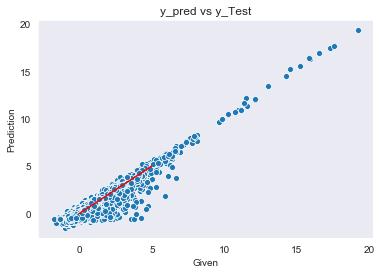

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)

print('Evaluación calidad Modelo')

mae_lr = round(mean_absolute_error(y_test, predictions_lr), 4)
rmse_lr = round(sqrt(mean_squared_error(y_test, predictions_lr)), 4)
r2_lr = round(r2_score(y_test, predictions_lr), 4)

print("    MAE", round(mean_absolute_error(y_test, predictions_lr), 4))
print("    RMSE", round(sqrt(mean_squared_error(y_test, predictions_lr)), 4))
print("    R2", round(r2_score(y_test, predictions_lr), 4))

 # set viz style
sns.set_style('dark')
# plot the model
plot = sns.scatterplot(y_test, predictions_lr)
plot.set(xlabel='Given', ylabel='Prediction')
plot.set_title('y_pred vs y_Test')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

### Implementación de DecisionTreeRegressor

Evaluación calidad Modelo
    MAE 0.2637
    RMSE 0.3982
    R2 0.842


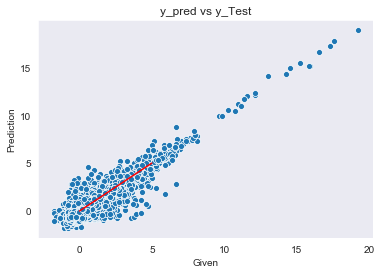

In [21]:
dtr = DecisionTreeRegressor(random_state=32)
dtr.fit(X_train, y_train)
predictions_dtr = dtr.predict(X_test)

print('Evaluación calidad Modelo')

mae_dtr = round(mean_absolute_error(y_test, predictions_dtr), 4)
rmse_dtr = round(sqrt(mean_squared_error(y_test, predictions_dtr)), 4)
r2_dtr = round(r2_score(y_test, predictions_dtr), 4)

print("    MAE",  mae_dtr)
print("    RMSE", rmse_dtr)
print("    R2", r2_dtr)

 # set viz style
sns.set_style('dark')
# plot the model
plot = sns.scatterplot(y_test, predictions_dtr)
plot.set(xlabel='Given', ylabel='Prediction')
plot.set_title('y_pred vs y_Test')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

### Implementación de Regresión Ridge

Evaluación calidad Modelo
    MAE 0.179
    RMSE 0.2836
    R2 0.9199


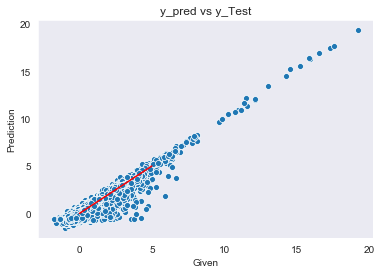

In [22]:
rr = Ridge(alpha=1)
rr.fit(X_train, y_train)
predictions_rr = rr.predict(X_test)

print('Evaluación calidad Modelo')

mae_rr = round(mean_absolute_error(y_test, predictions_rr), 4)
rmse_rr = round(sqrt(mean_squared_error(y_test, predictions_rr)), 4)
r2_rr = round(r2_score(y_test, predictions_rr), 4)

print("    MAE",  mae_rr)
print("    RMSE", rmse_rr)
print("    R2", r2_rr)

 # set viz style
sns.set_style('dark')
# plot the model
plot = sns.scatterplot(y_test, predictions_rr)
plot.set(xlabel='Given', ylabel='Prediction')
plot.set_title('y_pred vs y_Test')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

### Implementación de Regresión Lasso

Evaluación calidad Modelo
    MAE 0.1934
    RMSE 0.3018
    R2 0.9093


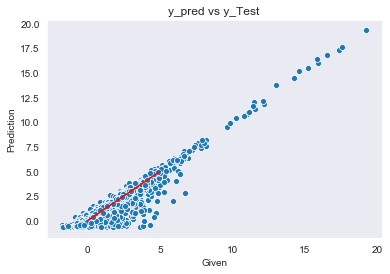

In [23]:
lassor = Lasso(alpha=0.01)
lassor.fit(X_train, y_train)
predictions_lassor = lassor.predict(X_test)

print('Evaluación calidad Modelo')

mae_lassor = round(mean_absolute_error(y_test, predictions_lassor), 4)
rmse_lassor = round(sqrt(mean_squared_error(y_test, predictions_lassor)), 4)
r2_lassor = round(r2_score(y_test, predictions_lassor), 4)

print("    MAE",  mae_lassor)
print("    RMSE", rmse_lassor)
print("    R2", r2_lassor)

 # set viz style
sns.set_style('dark')
# plot the model
plot = sns.scatterplot(y_test, predictions_lassor)
plot.set(xlabel='Given', ylabel='Prediction')
plot.set_title('y_pred vs y_Test')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

### Implementación de Modelo Elastic Net

Evaluación calidad Modelo
    MAE 0.1845
    RMSE 0.2912
    R2 0.9155


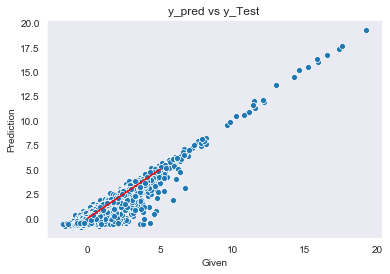

In [24]:
en = ElasticNet(alpha=0.01)
en.fit(X_train, y_train)
predictions_en = en.predict(X_test)

print('Evaluación calidad Modelo')

mae_en = round(mean_absolute_error(y_test, predictions_en), 4)
rmse_en = round(sqrt(mean_squared_error(y_test, predictions_en)), 4)
r2_en = round(r2_score(y_test, predictions_en), 4)

print("    MAE",  mae_en)
print("    RMSE", rmse_en)
print("    R2", r2_en)

 # set viz style
sns.set_style('dark')
# plot the model
plot = sns.scatterplot(y_test, predictions_en)
plot.set(xlabel='Given', ylabel='Prediction')
plot.set_title('y_pred vs y_Test')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

# EJERCICIO 2

In [25]:
# Comparación de modelos: 

models_used = ['Regresión Lineal', 'Decision Tree Reg', 'Ridge', 'Lasso', 'Elastic Net']
maes = [mae_lr, mae_dtr, mae_rr, mae_lassor, mae_en]
rmses = [rmse_lr, rmse_dtr, rmse_rr, rmse_lassor, rmse_en]
r2s = [r2_lr, r2_dtr, r2_rr, r2_lassor, r2_en]

col={'MAE':maes,'RMSE':rmses, 'R2':r2s}

df=pd.DataFrame(data=col,index=models_used)
df

,MAE,RMSE,R2
Regresión Lineal,0.1790,0.2836,0.9199
Decision Tree Reg,0.2637,0.3982,0.8420
Ridge,0.1790,0.2836,0.9199
Lasso,0.1934,0.3018,0.9093
Elastic Net,0.1845,0.2912,0.9155


### <font color='red'> Los modelos de Regresión Lineal y Ridge sobresalen como aquellos con mayor capacidad de predicción de ArrDelay </font> 

# EJERCICIO 3

## Cambio de parámetros en modelos

### Decision Tree Regressor

In [26]:
# Build some models and check them against training data using MAE, RMSE and R2
models = [DecisionTreeRegressor(random_state=32, max_depth=5), DecisionTreeRegressor(random_state=32, max_depth=8), DecisionTreeRegressor(random_state=32, max_depth=10), DecisionTreeRegressor(random_state=32, max_depth=12)]
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(type(model).__name__)
    print("    MAE", round(mean_absolute_error(y_test, predictions), 4))
    print("    RMSE", round(sqrt(mean_squared_error(y_test, predictions)), 4))
    print("    R2", round(r2_score(y_test, predictions), 4))


DecisionTreeRegressor
    MAE 0.2022
    RMSE 0.3113
    R2 0.9035
DecisionTreeRegressor
    MAE 0.1876
    RMSE 0.294
    R2 0.9139
DecisionTreeRegressor
    MAE 0.1849
    RMSE 0.2951
    R2 0.9133
DecisionTreeRegressor
    MAE 0.1887
    RMSE 0.3053
    R2 0.9071



### <font color='red'> --> Mientras más alto el max_depth, mejor la performance. Desde Max_depth = 8, la calidad empieza a empeorar. </font> 

### Ridge

In [27]:
# Build some models and check them against training data using MAE, RMSE and R2
models = [Ridge(alpha=1), Ridge(alpha=100), Ridge(alpha=1000), Ridge(alpha=10000), Ridge(alpha=100000)]
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(type(model).__name__)
    print("    MAE", round(mean_absolute_error(y_test, predictions), 4))
    print("    RMSE", round(sqrt(mean_squared_error(y_test, predictions)), 4))
    print("    R2", round(r2_score(y_test, predictions), 4))


Ridge
    MAE 0.179
    RMSE 0.2836
    R2 0.9199
Ridge
    MAE 0.1789
    RMSE 0.2837
    R2 0.9199
Ridge
    MAE 0.1801
    RMSE 0.2859
    R2 0.9186
Ridge
    MAE 0.1986
    RMSE 0.3073
    R2 0.906
Ridge
    MAE 0.3549
    RMSE 0.5263
    R2 0.7241



### <font color='red'> --> Mientras más alto sea Alpha, peor el modelo.  </font> 

### Lasso

In [28]:
# Build some models and check them against training data using MAE, RMSE and R2
models = [Lasso(alpha=0.00001), Lasso(alpha=0.001), Lasso(alpha=0.01), Lasso(alpha=0.1), Lasso(alpha=0.5)]
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(type(model).__name__)
    print("    MAE", round(mean_absolute_error(y_test, predictions), 4))
    print("    RMSE", round(sqrt(mean_squared_error(y_test, predictions)), 4))
    print("    R2", round(r2_score(y_test, predictions), 4))


Lasso
    MAE 0.179
    RMSE 0.2836
    R2 0.9199
Lasso
    MAE 0.1789
    RMSE 0.2838
    R2 0.9198
Lasso
    MAE 0.1934
    RMSE 0.3018
    R2 0.9093
Lasso
    MAE 0.2146
    RMSE 0.3262
    R2 0.894
Lasso
    MAE 0.3981
    RMSE 0.5925
    R2 0.6504



### <font color='red'> --> Mientras más alto sea Alpha, peor el modelo.  </font> 

### Elastic Net

In [29]:
# Build some models and check them against training data using MAE, RMSE and R2
models = [ElasticNet(alpha=0.01, l1_ratio=0.01), ElasticNet(alpha=0.01, l1_ratio=1), ElasticNet(alpha=1, l1_ratio=1), ElasticNet(alpha=0.01, l1_ratio=0.5), ElasticNet(alpha=0.01, l1_ratio=0.5)]
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(type(model).__name__)
    print("    MAE", round(mean_absolute_error(y_test, predictions), 4))
    print("    RMSE", round(sqrt(mean_squared_error(y_test, predictions)), 4))
    print("    R2", round(r2_score(y_test, predictions), 4))


ElasticNet
    MAE 0.1807
    RMSE 0.2868
    R2 0.9181
ElasticNet
    MAE 0.1934
    RMSE 0.3018
    R2 0.9093
ElasticNet
    MAE 0.6568
    RMSE 1.002
    R2 -0.0
ElasticNet
    MAE 0.1845
    RMSE 0.2912
    R2 0.9155
ElasticNet
    MAE 0.1845
    RMSE 0.2912
    R2 0.9155



### <font color='red'> --> Mientras más alto sea Alpha, peor el modelo.  </font> 

# EJERCICIO 4:


Compara su rendimiento utilizando la aproximación traicionando / test o utilizando todos los datos (validación interna)

### Defining X and y for the whole dataset

In [30]:
X = reduced_sample_train.drop(columns = columns_to_drop, axis=1).values
y = reduced_sample_train['ArrDelay'].values

### Implementación de Cross Validation en Modelo de Regresión Lineal

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_lr = lin_reg.predict(X_test)

#Mutiple Linear Regression Accuracy with test set
accuracy_lf = metrics.r2_score(y_test, y_pred_lr)
print('Precisión Modelo de Regresión Lineal: ', accuracy_lf)

#Predicting the SalePrice using cross validation (KFold method)
y_pred_kf_lr = cross_val_predict(lin_reg, X, y, cv=10 )

#Mutiple Linear Regression Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(y, y_pred_kf_lr)
print('Precisión - Cross-Predicted(KFold) Regresión Lineal: ', accuracy_lf)

Precisión Modelo de Regresión Lineal:  0.9198736967728443
Precisión - Cross-Predicted(KFold) Regresión Lineal:  0.920974508594885


### Implementación de Cross Validation en DecisionTreeRegressor

In [32]:
dt_reg = DecisionTreeRegressor(random_state=32)
dt_reg.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_dt = dt_reg.predict(X_test)

#Mutiple Linear Regression Accuracy with test set
accuracy_lf = metrics.r2_score(y_test, y_pred_dt)
print('Precisión Modelo de Regresión de Arbol: ', accuracy_lf)

#Predicting the SalePrice using cross validation (KFold method)
y_pred_kf_dt = cross_val_predict(dt_reg, X, y, cv=10 )

#Mutiple Linear Regression Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(y, y_pred_kf_dt)
print('Precisión - Cross-Predicted(KFold) Regresión de Arbol: ', accuracy_lf)

Precisión Modelo de Regresión de Arbol:  0.8420387323825986
Precisión - Cross-Predicted(KFold) Regresión de Arbol:  0.8407044871322573


### Implementación de Cross Validation en Ridge

In [33]:

ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_ridge = dt_reg.predict(X_test)

#Mutiple Linear Regression Accuracy with test set
accuracy_lf = metrics.r2_score(y_test, y_pred_ridge)
print('Precisión Modelo de Regresión de Arbol: ', accuracy_lf)

#Predicting the SalePrice using cross validation (KFold method)
y_pred_kf_ridge = cross_val_predict(ridge_reg, X, y, cv=10 )

#Mutiple Linear Regression Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(y, y_pred_kf_ridge)
print('Precisión - Cross-Predicted(KFold) Regresión de Arbol: ', accuracy_lf)

Precisión Modelo de Regresión de Arbol:  0.8420387323825986
Precisión - Cross-Predicted(KFold) Regresión de Arbol:  0.9209744276738112


### Implementación de Cross Validation en Lasso

In [34]:

lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_lasso = dt_reg.predict(X_test)

#Mutiple Linear Regression Accuracy with test set
accuracy_lf = metrics.r2_score(y_test, y_pred_lasso)
print('Precisión Modelo de Regresión de Arbol: ', accuracy_lf)

#Predicting the SalePrice using cross validation (KFold method)
y_pred_kf_lasso = cross_val_predict(lasso_reg, X, y, cv=10 )

#Mutiple Linear Regression Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(y, y_pred_kf_lasso)
print('Precisión - Cross-Predicted(KFold) Regresión de Arbol: ', accuracy_lf)

Precisión Modelo de Regresión de Arbol:  0.8420387323825986
Precisión - Cross-Predicted(KFold) Regresión de Arbol:  0.8905795808169162


### Implementación de Cross Validation en Elastic Net

In [35]:

dt_en = ElasticNet(alpha = 0.01)
dt_en.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_en = dt_reg.predict(X_test)

#Mutiple Linear Regression Accuracy with test set
accuracy_lf = metrics.r2_score(y_test, y_pred_en)
print('Precisión Modelo de Regresión de Arbol: ', accuracy_lf)

#Predicting the SalePrice using cross validation (KFold method)
y_pred_kf_en = cross_val_predict(dt_en, X, y, cv=10 )

#Mutiple Linear Regression Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(y, y_pred_kf_en)
print('Precisión - Cross-Predicted(KFold) Regresión de Arbol: ', accuracy_lf)

Precisión Modelo de Regresión de Arbol:  0.8420387323825986
Precisión - Cross-Predicted(KFold) Regresión de Arbol:  0.8987857988498924


## ---> En cada caso la calidad del modelo mediante el método Cross Validation es superior que mediante la implementación regular del mismo

# EJERCICIO 5: Feature Engeneering

### A) Inclusión de variable "ArrDelay_vs_CRSElapsedTime" (creada en Tasca anterior). Esta variable expresa la cantidad de minutos demorados respecto a la duración estimada de viaje

In [36]:
columns_to_drop_a = ['FullCarrier', 'Origin', 'Dest', 'Delay_level', 'ArrTime_Range', 'DepTime_Range', 'Unnamed: 0', 'index', 'Cancelled', 'ArrDelay', 'CRSElapsedTime', 'ArrTime', 'DepTime', '10%_Delayed']

In [37]:
X_train_a = train.drop(columns = columns_to_drop_a, axis=1).values
y_train_a = train['ArrDelay'].values

In [38]:
X_train_a

array([[ 7.        ,  0.95605656, -0.90784465, -0.76883296,  0.25193994,
         1.48735561],
       [ 7.        , -0.28318229,  1.73029353,  1.69227782,  0.60878355,
        -0.42456627],
       [ 5.        , -0.69626191, -0.51431022, -0.44812164,  0.20191882,
        -0.53880558],
       ...,
       [ 4.        ,  0.58052964,  0.05412839, -0.27556501, -0.7074219 ,
         0.45602846],
       [ 1.        , -0.65870921, -0.8932693 , -0.80543589, -0.10057114,
        -0.65939153],
       [ 1.        , -0.67748556,  0.18530653,  0.11835216,  0.15790416,
        -0.70064461]])

In [39]:
X_test_a = test.drop(columns = columns_to_drop_a, axis=1).values
y_test_a = test['ArrDelay'].values

In [40]:
X_test_a

array([[ 4.        , -0.2456296 ,  3.17325308,  2.86008535,  0.4509413 ,
        -0.6308317 ],
       [ 7.        ,  5.38727426, -0.8641186 , -0.71480008,  0.37088781,
         5.71103698],
       [ 7.        , -0.65870921, -0.13535115, -0.23896209, -0.16162054,
         0.63849403],
       ...,
       [ 1.        , -0.4897221 ,  0.37478607,  0.42511951,  0.53926601,
        -0.53880558],
       [ 2.        , -0.4897221 ,  1.4533619 ,  1.4691743 ,  0.65801694,
        -0.44360615],
       [ 7.        ,  0.31766079,  0.53511491,  0.35191366,  0.03068508,
        -0.03107529]])

In [41]:
train.drop(columns=columns_to_drop_a, axis=1).head()

,DayOfWeek,DepDelay,AirTime,Distance,AvgSpeed,ArrDelay_vs_CRSElapsedTime
747974,7,0.956057,-0.907845,-0.768833,0.251940,1.487356
896507,7,-0.283182,1.730294,1.692278,0.608784,-0.424566
1525158,5,-0.696262,-0.514310,-0.448122,0.201919,-0.538806
432233,6,-0.639933,-0.718365,-0.676454,-0.134247,-0.508659
1161614,6,1.312807,-0.645488,-0.416748,0.946229,1.001839


In [42]:
y_train_a

array([ 0.78937331, -0.17933952, -0.63727649, ...,  0.77176035,
       -0.76056722, -0.84863202])

### Evaluación del nuevo modelo

In [43]:
# Build some models and check them against training data using MAE, RMSE and R2
models = [LinearRegression(), DecisionTreeRegressor(random_state=32), Ridge(alpha=0.01), Lasso(alpha=0.01), ElasticNet(alpha = 0.01)]
for model in models:
    model.fit(X_train_a, y_train_a)
    predictions_a = model.predict(X_test_a)
    print(type(model).__name__)
    print("    MAE", round(mean_absolute_error(y_test_a, predictions_a), 4))
    print("    RMSE", round(sqrt(mean_squared_error(y_test_a, predictions_a)), 4))
    print("    R2", round(r2_score(y_test_a, predictions_a), 4))

LinearRegression
    MAE 0.1525
    RMSE 0.2466
    R2 0.9394
DecisionTreeRegressor
    MAE 0.0542
    RMSE 0.1289
    R2 0.9835
Ridge
    MAE 0.1525
    RMSE 0.2466
    R2 0.9394
Lasso
    MAE 0.1667
    RMSE 0.265
    R2 0.9301
ElasticNet
    MAE 0.1583
    RMSE 0.2549
    R2 0.9353


## B) Inclusión de variables categóricas ArrTime, DepTime y ArrDelay 

### Transformación de Rangos a variables Ordinales

In [44]:
le = preprocessing.LabelEncoder()

In [45]:
columns_to_encode = ['ArrTime_Range', 'DepTime_Range', 'Delay_level']

In [46]:
train[columns_to_encode] = train[columns_to_encode].apply(le.fit_transform)

C:\Users\tomi_\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [47]:
test[columns_to_encode] = test[columns_to_encode].apply(le.fit_transform)

### Definiciòn de variables de nuevo modelo incluyendo ArrTime_Rabge, DepTime_Range, Delay_level

In [48]:
columns_to_drop_b = ['FullCarrier', 'Origin', 'Dest', 'Unnamed: 0', 'index', 'Cancelled', 'ArrDelay', 'CRSElapsedTime', 'ArrTime', 'DepTime', '10%_Delayed']

In [49]:
train.drop(columns = columns_to_drop_b, axis=1).head()

,DayOfWeek,DepDelay,AirTime,Distance,AvgSpeed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range
747974,7,0.956057,-0.907845,-0.768833,0.251940,1.487356,2,16,15
896507,7,-0.283182,1.730294,1.692278,0.608784,-0.424566,0,8,5
1525158,5,-0.696262,-0.514310,-0.448122,0.201919,-0.538806,3,13,11
432233,6,-0.639933,-0.718365,-0.676454,-0.134247,-0.508659,3,6,4
1161614,6,1.312807,-0.645488,-0.416748,0.946229,1.001839,2,0,0


In [50]:
X_train_b = train.drop(columns = columns_to_drop_b, axis=1).values
y_train_b = train['ArrDelay'].values

In [51]:
X_train_b

array([[ 7.        ,  0.95605656, -0.90784465, ...,  2.        ,
        16.        , 15.        ],
       [ 7.        , -0.28318229,  1.73029353, ...,  0.        ,
         8.        ,  5.        ],
       [ 5.        , -0.69626191, -0.51431022, ...,  3.        ,
        13.        , 11.        ],
       ...,
       [ 4.        ,  0.58052964,  0.05412839, ...,  2.        ,
        15.        , 14.        ],
       [ 1.        , -0.65870921, -0.8932693 , ...,  3.        ,
        10.        ,  9.        ],
       [ 1.        , -0.67748556,  0.18530653, ...,  3.        ,
        12.        , 12.        ]])

In [52]:
X_test_b = test.drop(columns = columns_to_drop_b, axis=1).values
y_test_b = test['ArrDelay'].values

In [53]:
X_test_b

array([[ 4.        , -0.2456296 ,  3.17325308, ...,  3.        ,
        18.        , 16.        ],
       [ 7.        ,  5.38727426, -0.8641186 , ...,  2.        ,
        17.        , 16.        ],
       [ 7.        , -0.65870921, -0.13535115, ...,  2.        ,
        14.        , 10.        ],
       ...,
       [ 1.        , -0.4897221 ,  0.37478607, ...,  3.        ,
         9.        ,  5.        ],
       [ 2.        , -0.4897221 ,  1.4533619 , ...,  0.        ,
         6.        ,  4.        ],
       [ 7.        ,  0.31766079,  0.53511491, ...,  1.        ,
        13.        , 12.        ]])

In [54]:
train.drop(columns=columns_to_drop_b, axis=1).head()

,DayOfWeek,DepDelay,AirTime,Distance,AvgSpeed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range
747974,7,0.956057,-0.907845,-0.768833,0.251940,1.487356,2,16,15
896507,7,-0.283182,1.730294,1.692278,0.608784,-0.424566,0,8,5
1525158,5,-0.696262,-0.514310,-0.448122,0.201919,-0.538806,3,13,11
432233,6,-0.639933,-0.718365,-0.676454,-0.134247,-0.508659,3,6,4
1161614,6,1.312807,-0.645488,-0.416748,0.946229,1.001839,2,0,0


In [55]:
y_train_b

array([ 0.78937331, -0.17933952, -0.63727649, ...,  0.77176035,
       -0.76056722, -0.84863202])

### Evaluación del nuevo modelo

In [56]:
# Build some models and check them against training data using MAE, RMSE and R2
models = [LinearRegression(), DecisionTreeRegressor(random_state=32), Ridge(alpha=0.01), Lasso(alpha=0.01), ElasticNet(alpha = 0.01)]
for model in models:
    model.fit(X_train_b, y_train_b)
    predictions_b = model.predict(X_test_b)
    print(type(model).__name__)
    print("    MAE", round(mean_absolute_error(y_test_b, predictions_b), 4))
    print("    RMSE", round(sqrt(mean_squared_error(y_test_b, predictions_b)), 4))
    print("    R2", round(r2_score(y_test_b, predictions_b), 4))

LinearRegression
    MAE 0.1482
    RMSE 0.2425
    R2 0.9414
DecisionTreeRegressor
    MAE 0.0554
    RMSE 0.1319
    R2 0.9827
Ridge
    MAE 0.1482
    RMSE 0.2425
    R2 0.9414
Lasso
    MAE 0.1601
    RMSE 0.2594
    R2 0.933
ElasticNet
    MAE 0.1531
    RMSE 0.2508
    R2 0.9374


## C) Inclusión de variables FullCarrier, Origin & Dest

### Conversión de variables Dummy

En caso de efectuar el Train Test Split antes de la conversión de variables Dummy, está sucediendo que algunas de los valores de las variables categóricas no son incluidos en el TEST set, de manera que al realizar la conversión a Dummies, la cantidad de variables totales entre TRAIN y TEST set termina por ser diferente e imposibilita la evaluación del modelo.


--> Realizo conversión a Dummy y luego divido por TRAIN y TEST

### Inclusión de DUMMY variables en DATASET copiado

In [58]:
data3 = reduced_sample_train.copy()

In [59]:
le = preprocessing.LabelEncoder()

columns_to_encode = ['ArrTime_Range', 'DepTime_Range', 'Delay_level']

data3[columns_to_encode] = data3[columns_to_encode].apply(le.fit_transform)


In [60]:
data3 = pd.get_dummies(data=data3, columns=['FullCarrier', 'Origin', 'Dest'])

In [61]:
data3.head()

,Unnamed: 0,index,DayOfWeek,Cancelled,ArrDelay,CRSElapsedTime,DepDelay,ArrTime,DepTime,AirTime,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
1062173,1062177,950001,3,0,-0.320243,-0.578731,-0.564827,22:44,21:00,-0.616338,...,0,0,0,0,0,0,0,0,0,0
437738,437739,105992,5,0,-0.690115,-0.761293,-0.602380,16:23,15:11,-0.674639,...,0,0,0,0,0,0,0,0,0,0
1420704,1420710,1729205,7,0,4.259127,0.614945,4.373352,22:47,18:41,0.753745,...,0,0,0,0,0,0,0,0,0,0
576072,576073,1559234,7,0,-0.654889,-0.017001,-0.583604,15:38,12:32,-0.091625,...,0,0,0,0,0,0,0,0,0,0
684806,684808,1116800,1,0,-0.742954,-0.845553,-0.621157,07:19,06:15,-0.995297,...,0,0,0,0,0,0,0,0,0,0


### Separación en TRAIN y TEST sets

In [62]:
train3, test3 = train_test_split(data3, test_size = 0.2, random_state=42)

## Definiciòn de variables de nuevo modelo incluyendo FullCarrier, Origin y Dest

In [63]:
columns_to_drop_c = ['Unnamed: 0', 'index', 'Cancelled', 'ArrDelay', 'CRSElapsedTime', 'ArrTime', 'DepTime', '10%_Delayed']

In [64]:
X_train_c = train3.drop(columns = columns_to_drop_c, axis=1).values
y_train_c = train3['ArrDelay'].values

##### Checking same amount of columns:

In [65]:
print(len(train3.drop(columns = columns_to_drop_c, axis=1).columns))
print(len(test3.drop(columns = columns_to_drop_c, axis=1).columns))

622
622


In [66]:
X_test_c = test3.drop(columns = columns_to_drop_c, axis=1).values
y_test_c = test3['ArrDelay'].values

In [67]:
X_test_c

array([[ 4.        , -0.2456296 ,  3.17325308, ...,  0.        ,
         0.        ,  0.        ],
       [ 7.        ,  5.38727426, -0.8641186 , ...,  0.        ,
         0.        ,  0.        ],
       [ 7.        , -0.65870921, -0.13535115, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , -0.4897221 ,  0.37478607, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.        , -0.4897221 ,  1.4533619 , ...,  0.        ,
         0.        ,  0.        ],
       [ 7.        ,  0.31766079,  0.53511491, ...,  0.        ,
         0.        ,  0.        ]])

In [68]:
y_train_c

array([ 0.78937331, -0.17933952, -0.63727649, ...,  0.77176035,
       -0.76056722, -0.84863202])

In [69]:
train3.drop(columns=columns_to_drop_c, axis=1).head()

,DayOfWeek,DepDelay,AirTime,Distance,AvgSpeed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range,FullCarrier_AirTran Airways Corporation,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
747974,7,0.956057,-0.907845,-0.768833,0.251940,1.487356,2,16,15,0,...,0,0,0,0,0,0,0,0,0,0
896507,7,-0.283182,1.730294,1.692278,0.608784,-0.424566,0,8,5,0,...,0,0,0,0,0,0,0,0,0,0
1525158,5,-0.696262,-0.514310,-0.448122,0.201919,-0.538806,3,13,11,0,...,0,0,0,0,0,0,0,0,0,0
432233,6,-0.639933,-0.718365,-0.676454,-0.134247,-0.508659,3,6,4,0,...,0,0,0,0,0,0,0,0,0,0
1161614,6,1.312807,-0.645488,-0.416748,0.946229,1.001839,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
test3.drop(columns=columns_to_drop_c, axis=1).head()

,DayOfWeek,DepDelay,AirTime,Distance,AvgSpeed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range,FullCarrier_AirTran Airways Corporation,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
331306,4,-0.245630,3.173253,2.860085,0.450941,-0.630832,3,18,16,0,...,0,0,0,0,0,0,0,0,0,0
266174,7,5.387274,-0.864119,-0.714800,0.370888,5.711037,2,17,16,0,...,0,0,0,0,0,0,0,0,0,0
755686,7,-0.658709,-0.135351,-0.238962,-0.161621,0.638494,2,14,10,0,...,0,0,0,0,0,0,0,0,0,0
1119088,5,0.655635,0.622567,0.559330,0.339674,0.419535,2,13,9,0,...,0,0,0,0,0,0,0,0,0,0
1516357,2,-0.508498,-0.018748,-0.151812,-0.165756,-0.556259,3,7,6,0,...,0,0,0,0,0,0,0,0,0,0


### Evaluación del nuevo modelo

In [71]:
# Build some models and check them against training data using MAE, RMSE and R2
models = [LinearRegression(), DecisionTreeRegressor(random_state=32), Ridge(alpha=0.01), Lasso(alpha=0.01), ElasticNet(alpha = 0.01), LinearRegression()]
for model in models:
    model.fit(X_train_c, y_train_c)
    predictions_c = model.predict(X_test_c)
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_test_c, predictions_c))
    print("    RMSE", sqrt(mean_squared_error(y_test_c, predictions_c)))
    print("    R2", r2_score(y_test_c, predictions_c))

LinearRegression
    MAE 1532.0421422459701
    RMSE 155355.32836219805
    R2 -24038549819.862785
DecisionTreeRegressor
    MAE 0.051162870466287876
    RMSE 0.12990393028516986
    R2 0.9831925998506543
Ridge
    MAE 0.13994768302094246
    RMSE 0.2306042976797251
    R2 0.947034783544381
Lasso
    MAE 0.16008477944680624
    RMSE 0.2594202560216544
    R2 0.9329708480013907
ElasticNet
    MAE 0.15245329365213553
    RMSE 0.25015878296241173
    R2 0.9376713861430714
LinearRegression
    MAE 1880.7581996054976
    RMSE 190719.79040524788
    R2 -36228260294.54027


# EJERCICIO 6: Modelos excluyendo "DepDelay"

### Modelo con selección de variables básicas sin DepDelay

In [72]:
train_columns_to_drop_final = ['DepDelay', 'FullCarrier', 'Origin', 'Dest', 'Delay_level', 'ArrTime_Range', 'DepTime_Range', 'Unnamed: 0', 'index', 'Cancelled', 'ArrDelay', 'CRSElapsedTime', 'ArrTime', 'DepTime', '10%_Delayed']

In [73]:
train.drop(columns=train_columns_to_drop_final, axis=1)

,DayOfWeek,AirTime,Distance,AvgSpeed,ArrDelay_vs_CRSElapsedTime
747974,7,-0.907845,-0.768833,0.251940,1.487356
896507,7,1.730294,1.692278,0.608784,-0.424566
1525158,5,-0.514310,-0.448122,0.201919,-0.538806
432233,6,-0.718365,-0.676454,-0.134247,-0.508659
1161614,6,-0.645488,-0.416748,0.946229,1.001839
...,...,...,...,...,...
280608,3,-0.645488,-0.857726,-1.389206,0.527428
363704,4,0.127005,0.278708,0.761506,2.590082
1235607,4,0.054128,-0.275565,-0.707422,0.456028
448013,1,-0.893269,-0.805436,-0.100571,-0.659392


In [74]:
X_train_final = train.drop(columns = train_columns_to_drop_final, axis=1).values
y_train_final = train['ArrDelay'].values

In [75]:
X_train_final

array([[ 7.        , -0.90784465, -0.76883296,  0.25193994,  1.48735561],
       [ 7.        ,  1.73029353,  1.69227782,  0.60878355, -0.42456627],
       [ 5.        , -0.51431022, -0.44812164,  0.20191882, -0.53880558],
       ...,
       [ 4.        ,  0.05412839, -0.27556501, -0.7074219 ,  0.45602846],
       [ 1.        , -0.8932693 , -0.80543589, -0.10057114, -0.65939153],
       [ 1.        ,  0.18530653,  0.11835216,  0.15790416, -0.70064461]])

In [76]:
X_test_final = test.drop(columns = train_columns_to_drop_final, axis=1).values
y_test_final = test['ArrDelay'].values

In [77]:
X_test_final

array([[ 4.        ,  3.17325308,  2.86008535,  0.4509413 , -0.6308317 ],
       [ 7.        , -0.8641186 , -0.71480008,  0.37088781,  5.71103698],
       [ 7.        , -0.13535115, -0.23896209, -0.16162054,  0.63849403],
       ...,
       [ 1.        ,  0.37478607,  0.42511951,  0.53926601, -0.53880558],
       [ 2.        ,  1.4533619 ,  1.4691743 ,  0.65801694, -0.44360615],
       [ 7.        ,  0.53511491,  0.35191366,  0.03068508, -0.03107529]])

In [78]:
train.drop(columns=train_columns_to_drop_final, axis=1).head()

,DayOfWeek,AirTime,Distance,AvgSpeed,ArrDelay_vs_CRSElapsedTime
747974,7,-0.907845,-0.768833,0.251940,1.487356
896507,7,1.730294,1.692278,0.608784,-0.424566
1525158,5,-0.514310,-0.448122,0.201919,-0.538806
432233,6,-0.718365,-0.676454,-0.134247,-0.508659
1161614,6,-0.645488,-0.416748,0.946229,1.001839


In [79]:
y_train_final

array([ 0.78937331, -0.17933952, -0.63727649, ...,  0.77176035,
       -0.76056722, -0.84863202])

In [80]:
# Build some models and check them against training data using MAE, RMSE and R2
models = [LinearRegression(), DecisionTreeRegressor(random_state=32), Ridge(alpha=0.01), Lasso(alpha=0.01), ElasticNet(alpha = 0.01)]
for model in models:
    model.fit(X_train_final, y_train_final)
    predictions = model.predict(X_test_final)
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_test_final, predictions))
    print("    RMSE", sqrt(mean_squared_error(y_test_final, predictions)))
    print("    R2", r2_score(y_test_final, predictions))

LinearRegression
    MAE 0.24044946650175203
    RMSE 0.4645656201550736
    R2 0.785043742663586
DecisionTreeRegressor
    MAE 0.0709604683803007
    RMSE 0.17938868234688088
    R2 0.9679486713326617
Ridge
    MAE 0.24044945447277316
    RMSE 0.46456562793609857
    R2 0.785043735462967
Lasso
    MAE 0.24133346724120808
    RMSE 0.46846873561172514
    R2 0.7814165970451792
ElasticNet
    MAE 0.24161660755129166
    RMSE 0.4681730467241525
    R2 0.7816924416463952


### <font color='red'> La precisión del modelo baja significativamente al eliminar "DepDelay" como variable independiente </font> 

### Modelo con "feature engeneering" sin DepDelay

In [81]:
columns_to_drop3_final = ['DepDelay', 'Unnamed: 0', 'index', 'Cancelled', 'ArrDelay', 'CRSElapsedTime', 'ArrTime', 'DepTime', '10%_Delayed']

In [82]:
X_train3_final = train3.drop(columns = columns_to_drop3_final, axis=1).values
y_train3_final = train3['ArrDelay'].values

##### Checking same amount of columns:

In [83]:
print(len(train3.drop(columns = columns_to_drop3_final, axis=1).columns))
print(len(test3.drop(columns = columns_to_drop3_final, axis=1).columns))

621
621


In [84]:
X_train3_final

array([[ 7.        , -0.90784465, -0.76883296, ...,  0.        ,
         0.        ,  0.        ],
       [ 7.        ,  1.73029353,  1.69227782, ...,  0.        ,
         0.        ,  0.        ],
       [ 5.        , -0.51431022, -0.44812164, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 4.        ,  0.05412839, -0.27556501, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.8932693 , -0.80543589, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.18530653,  0.11835216, ...,  0.        ,
         0.        ,  0.        ]])

In [85]:
X_test3_final = test3.drop(columns = columns_to_drop3_final, axis=1).values
y_test3_final = test3['ArrDelay'].values

In [86]:
X_test3_final

array([[ 4.        ,  3.17325308,  2.86008535, ...,  0.        ,
         0.        ,  0.        ],
       [ 7.        , -0.8641186 , -0.71480008, ...,  0.        ,
         0.        ,  0.        ],
       [ 7.        , -0.13535115, -0.23896209, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  0.37478607,  0.42511951, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.        ,  1.4533619 ,  1.4691743 , ...,  0.        ,
         0.        ,  0.        ],
       [ 7.        ,  0.53511491,  0.35191366, ...,  0.        ,
         0.        ,  0.        ]])

In [87]:
y_train3_final

array([ 0.78937331, -0.17933952, -0.63727649, ...,  0.77176035,
       -0.76056722, -0.84863202])

In [88]:
train3.drop(columns=columns_to_drop3_final, axis=1).head()

,DayOfWeek,AirTime,Distance,AvgSpeed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range,FullCarrier_AirTran Airways Corporation,FullCarrier_Alaska Airlines Inc.,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
747974,7,-0.907845,-0.768833,0.251940,1.487356,2,16,15,0,0,...,0,0,0,0,0,0,0,0,0,0
896507,7,1.730294,1.692278,0.608784,-0.424566,0,8,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1525158,5,-0.514310,-0.448122,0.201919,-0.538806,3,13,11,0,0,...,0,0,0,0,0,0,0,0,0,0
432233,6,-0.718365,-0.676454,-0.134247,-0.508659,3,6,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1161614,6,-0.645488,-0.416748,0.946229,1.001839,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
test3.drop(columns=columns_to_drop3_final, axis=1).head()

,DayOfWeek,AirTime,Distance,AvgSpeed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range,FullCarrier_AirTran Airways Corporation,FullCarrier_Alaska Airlines Inc.,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
331306,4,3.173253,2.860085,0.450941,-0.630832,3,18,16,0,0,...,0,0,0,0,0,0,0,0,0,0
266174,7,-0.864119,-0.714800,0.370888,5.711037,2,17,16,0,0,...,0,0,0,0,0,0,0,0,0,0
755686,7,-0.135351,-0.238962,-0.161621,0.638494,2,14,10,0,0,...,0,0,0,0,0,0,0,0,0,0
1119088,5,0.622567,0.559330,0.339674,0.419535,2,13,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1516357,2,-0.018748,-0.151812,-0.165756,-0.556259,3,7,6,0,0,...,0,0,0,0,0,0,0,0,0,0


### Evaluación del nuevo modelo

In [90]:
# Build some models and check them against training data using MAE, RMSE and R2
models = [LinearRegression(), DecisionTreeRegressor(random_state=32), Ridge(alpha=0.01), Lasso(alpha=0.01), ElasticNet(alpha = 0.01), LinearRegression()]
for model in models:
    model.fit(X_train3_final, y_train3_final)
    predictions3_final = model.predict(X_test3_final)
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_test3_final, predictions3_final))
    print("    RMSE", sqrt(mean_squared_error(y_test3_final, predictions3_final)))
    print("    R2", r2_score(y_test3_final, predictions3_final))

LinearRegression
    MAE 87.06574830621068
    RMSE 8805.308425065014
    R2 -77222720.52855016
DecisionTreeRegressor
    MAE 0.05934769670806621
    RMSE 0.1610072273441332
    R2 0.9741805670319417
Ridge
    MAE 0.23986471169974474
    RMSE 0.4436195825053296
    R2 0.8039903851038996
Lasso
    MAE 0.24154196890106486
    RMSE 0.46176287508252495
    R2 0.7876296001102083
ElasticNet
    MAE 0.2417621842327534
    RMSE 0.46064913485843983
    R2 0.7886528101946978
LinearRegression
    MAE 87.06574830621068
    RMSE 8805.308425065014
    R2 -77222720.52855016


### <font color='red'> La precisión del modelo baja significativamente al eliminar "DepDelay" como variable independiente </font> 